In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV

In [63]:
class RFregressor:
    
    def __init__(self, datafile, outcome, nonfeatures = []):
        self.df = pd.read_csv(datafile)
        self.X = np.array(self.df.drop(nonfeatures, 1))
        self.y = np.array(self.df[outcome])
        self.Xdf = pd.DataFrame(self.X)
        self.ydf = pd.DataFrame(self.y)
        
    def grid_search(self, scoring, max_depth=[], n_estimators=[], cv=[]):
        self.gsc = GridSearchCV(
                estimator=RandomForestRegressor(),
                param_grid={
                    'max_depth': max_depth,
                    'n_estimators': n_estimators,
                },
                cv=cv, scoring=scoring, verbose=0,n_jobs=-1)
        self.grid_result = self.gsc.fit(self.X, self.y)
        self.best_params = self.grid_result.best_params_
        print(self.best_params)
        
    def regress(self, scoring, cv=[]):
        self.rf_model = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], random_state=2, verbose=False)
        self.predictions = cross_val_predict(self.rf_model, self.X, self.y, cv=cv)
        self.scores = cross_val_score(self.rf_model, self.X, self.y, cv=cv, scoring=scoring)
        print(self.scores)
        
    def importance(self):
        self.rf_model.fit(self.X, self.y)
        self.importance = self.rf_model.feature_importances_
        plt.bar([x for x in range(len(self.importance))], self.importance)
        plt.title('Feature Importances')
        plt.show()

In [71]:
RFR1 = RFregressor("SCALED_PCA_DATA.csv", 'presence', nonfeatures = ['labvisitid', 'presence'])
RFR1.grid_search('neg_mean_squared_error', max_depth=range(2,4), n_estimators=(50,60,70,80), cv=5)
RFR1.regress('neg_mean_squared_error', cv = 5)

{'max_depth': 3, 'n_estimators': 80}
[-0.48642488 -0.59441746 -0.44343374 -0.64391309 -0.47075922]


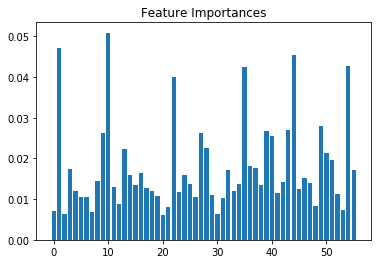

In [65]:
RFR1.importance()

In [69]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']